In [1]:
import pandas as pd

In [2]:
df = pd.read_parquet("../data/qsc_out.random_scan_nfp2.parquet")

In [3]:
y_sum = df[df.columns[df.columns.str.startswith('y')]].sum(axis=1)

In [4]:
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,y0,y1,y2,y3,y4,y5,y6
0,0.133438,-0.092950,0.011193,-0.005795,0.000771,-0.000122,-0.713354,0.129141,1.482134,0.213466,0.241207,0.475203,0.852697,1.067530,0.342066
1,0.106896,0.107480,0.007474,0.007549,0.000577,0.000333,-0.718440,-0.309748,1.711563,0.178743,0.181471,0.403228,0.821898,1.052911,0.333320
2,0.100286,0.098256,0.006654,0.006411,0.000179,0.000225,-0.775836,0.064299,1.895026,0.154513,0.204983,0.335392,0.807669,0.965668,0.331046
3,0.120435,0.114909,0.009287,0.008526,0.000167,0.000237,-0.767415,0.016524,1.380982,0.196482,0.304152,0.364896,0.833857,1.286199,0.337564
4,-0.128050,0.160498,0.009165,-0.010457,-0.000347,0.000200,-0.719544,0.569769,0.962259,0.304666,0.529468,0.435512,0.834355,1.311465,0.340612


In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[df.columns[df.columns.str.startswith('x')]])
scaled_data

array([[ 0.6881478 , -0.420379  ,  0.35922015, ..., -0.01047048,
         0.43289566,  0.02641897],
       [ 0.5527185 ,  0.48961788,  0.2525115 , ...,  0.02533789,
         0.42993385, -0.05925424],
       [ 0.51899165,  0.44773856,  0.22897898, ...,  0.01686174,
         0.39650637,  0.01376162],
       ...,
       [ 1.9945768 , -0.45505053, -0.02376227, ...,  2.4491253 ,
         0.23262705,  0.95367706],
       [ 2.8605056 ,  0.09978253,  4.4013305 , ...,  0.9157784 ,
         0.78573644, -0.03040482],
       [ 0.18245116,  0.09535785,  0.03467903, ...,  1.0080457 ,
        -2.7788122 ,  0.07097092]], dtype=float32)

In [7]:
from openTSNE import TSNE

In [8]:
tsne = TSNE(
    perplexity=30,
    metric="euclidean",
    n_jobs=6,
    random_state=42,
    verbose=True,
)

embedding_df = tsne.fit(scaled_data)

--------------------------------------------------------------------------------
TSNE(early_exaggeration=12, n_jobs=6, random_state=42, verbose=True)
--------------------------------------------------------------------------------
===> Finding 90 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 165.96 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 17.68 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 2.86 seconds
===> Running optimization with exaggeration=12.00, lr=83333.33 for 250 iterations...
Iteration   50, KL divergence 8.5103, 50 iterations in 62.1316 sec
Iteration  100, KL divergence 8.2537, 50 iterations in 69.8389 sec
Iteration  150, KL divergence 8.1163, 50 iterations in 71.1070 sec
Iteration  200, KL divergence 8.0678, 50 iterations in 69.6761 sec
Iteration  250, KL divergence 8.0433, 50 iterations in 62.0957 sec
   --> Time elapsed: 334.85 seconds
===> Running optimization with exa

In [9]:
embedding_df

TSNEEmbedding([[  3.62838076, -72.91966068],
               [-53.0096451 , -61.39514169],
               [-52.76944135, -61.4717076 ],
               ...,
               [-50.29834662, -77.82171039],
               [ 45.37275456, -81.6032482 ],
               [-17.10074114,  67.64689459]])

In [10]:
y_sum

0           4.674304
1           4.683134
2           4.694295
3           4.704133
4           4.718338
             ...    
999995    406.943329
999996    406.943604
999997    406.944824
999998    406.944824
999999    406.945221
Length: 1000000, dtype: float32

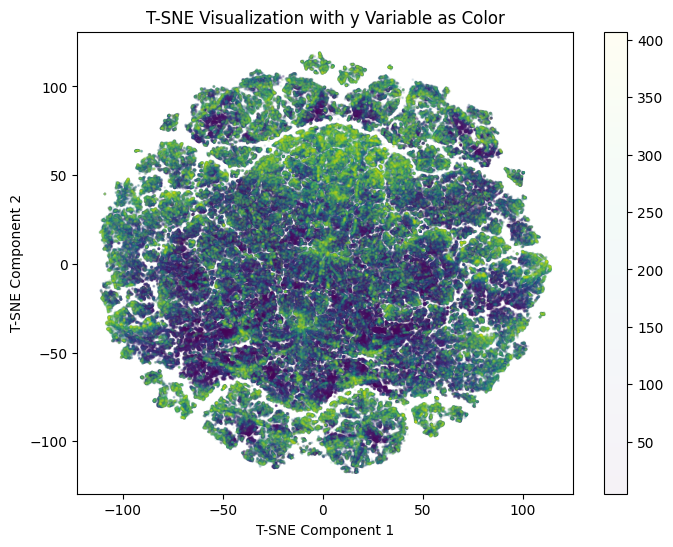

In [11]:
import matplotlib.pyplot as plt

# Plot T-SNE results
plt.figure(figsize=(8, 6))
scatter = plt.scatter(embedding_df[:, 0], embedding_df[:, 1], s=1, alpha=0.05, c=y_sum, cmap='viridis')
plt.colorbar(scatter)
plt.title('T-SNE Visualization with y Variable as Color')
plt.xlabel('T-SNE Component 1')
plt.ylabel('T-SNE Component 2')
plt.show()